# <font color=#3A86FF>Données nutritionnelles - Exploration </font>

## Sommaire

* [Chargement des donnees](#Chargement-des-donnees)
* [PCA](#PCA)
* [Reste à faire](#Reste-a-faire)

## <font color=#FB5607>Chargement des donnees</font>

In [10]:
import pandas as pd
import time

now = time.time()
df = pd.read_csv("products_clean.csv", encoding="utf-8",sep=",", low_memory=False)
time.time() - now

6.115685939788818

In [11]:
df.head()

,categories_tags,states_fr,countries,categories_fr,states,additives_fr,product_name,additives_tags,quantity,additives,...,vitamin-a_100g,fiber_100g,fat_100g,cholesterol_100g,saturated-fat_100g,proteins_100g,additives_n,energy_100g,salt_100g,nutrition_grade_fr.1
0,NaN,"A compléter,Informations nutritionnelles à com...",en:FR,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...",NaN,Farine de blé noir,NaN,1kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"A compléter,Informations nutritionnelles compl...",US,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,Banana Chips Sweetened (Whole),NaN,NaN,[ bananas -> en:bananas ] [ vegetable-oil -...,...,0.0,3.6,28.57,0.018,28.57,3.57,0.0,2243.0,0.00000,d
2,NaN,"A compléter,Informations nutritionnelles compl...",US,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,Peanuts,NaN,NaN,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,...,0.0,7.1,17.86,0.000,0.00,17.86,0.0,1941.0,0.63500,b
3,NaN,"A compléter,Informations nutritionnelles compl...",US,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,Organic Salted Nut Mix,NaN,NaN,[ organic-hazelnuts -> en:organic-hazelnuts ...,...,NaN,7.1,57.14,NaN,5.36,17.86,0.0,2540.0,1.22428,d
4,NaN,"A compléter,Informations nutritionnelles compl...",US,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,Organic Polenta,NaN,NaN,[ organic-polenta -> en:organic-polenta ] [...,...,NaN,5.7,1.43,NaN,NaN,8.57,0.0,1552.0,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   categories_tags          84389 non-null   object 
 1   states_fr                320726 non-null  object 
 2   countries                320492 non-null  object 
 3   categories_fr            84411 non-null   object 
 4   states                   320726 non-null  object 
 5   additives_fr             154680 non-null  object 
 6   product_name             303010 non-null  object 
 7   additives_tags           154680 non-null  object 
 8   quantity                 104819 non-null  object 
 9   additives                248905 non-null  object 
 10  nutrition_grade_fr       221210 non-null  object 
 11  brands                   292360 non-null  object 
 12  creator                  320770 non-null  object 
 13  main_category_fr         84366 non-null   object 
 14  coun

In [13]:
import numpy as np

# identification des colonnes numériques et qualitatives
colonnesNum=df.select_dtypes(np.number).columns.tolist()
colonnesQual=df.select_dtypes('O').columns.tolist()

## <font color=#FB5607>PCA</font>

In [20]:
# filtrage sur les variables quantitatives
X=df[colonnesNum].dropna()

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

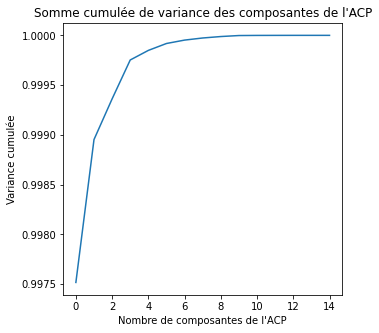

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X.shape[1])),
         np.cumsum(pca.explained_variance_ratio_))

In [39]:
# on verifie la variance expliquée en fonction du nombre de composante
evr1=round(np.cumsum(pca.explained_variance_ratio_)[1],4)
evr2=round(np.cumsum(pca.explained_variance_ratio_)[2],4)
evr3=round(np.cumsum(pca.explained_variance_ratio_)[3],4)
print(f"Variance expliquée avec:")
print(f"- 1 composante  = {evr1}%")
print(f"- 2 composantes = {evr2}%")
print(f"- 3 composantes = {evr3}%")

Variance expliquée avec:
- 1 composante  = 0.999%
- 2 composantes = 0.9994%
- 3 composantes = 0.9998%


In [40]:
colonnes_pca = X.columns
colonnes_pca

Index(['iron_100g', 'nutrition-score-fr_100g', 'vitamin-c_100g',
       'carbohydrates_100g', 'calcium_100g', 'sugars_100g', 'vitamin-a_100g',
       'fiber_100g', 'fat_100g', 'cholesterol_100g', 'saturated-fat_100g',
       'proteins_100g', 'additives_n', 'energy_100g', 'salt_100g'],
      dtype='object')

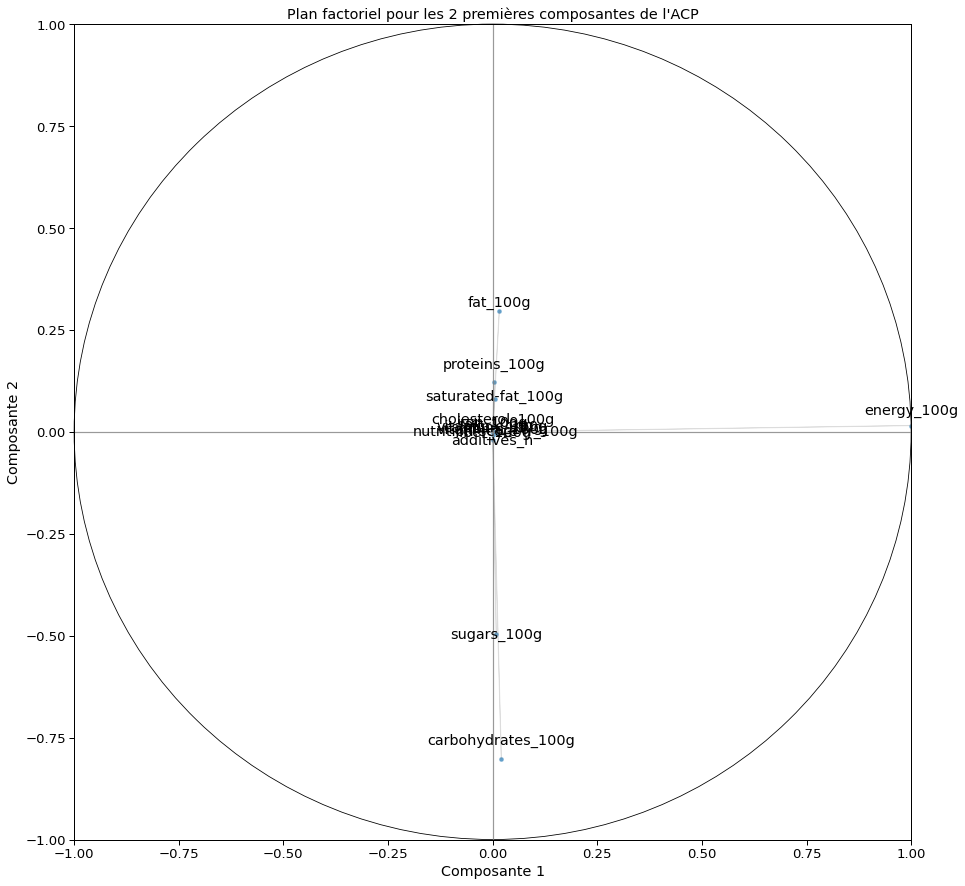

In [42]:
import seaborn as sns
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', 
                    clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',
             alpha=0.2)


sns.set_context("paper", font_scale=1)

In [43]:
x_show = pca.transform(X.select_dtypes(['float64','int32']))[:,0]
y_show = pca.transform(X.select_dtypes(['float64','int32']))[:,1]
z_show = pca.transform(X.select_dtypes(['float64','int32']))[:,2]

In [44]:
X_pca = pca.transform(X)[:,:3]

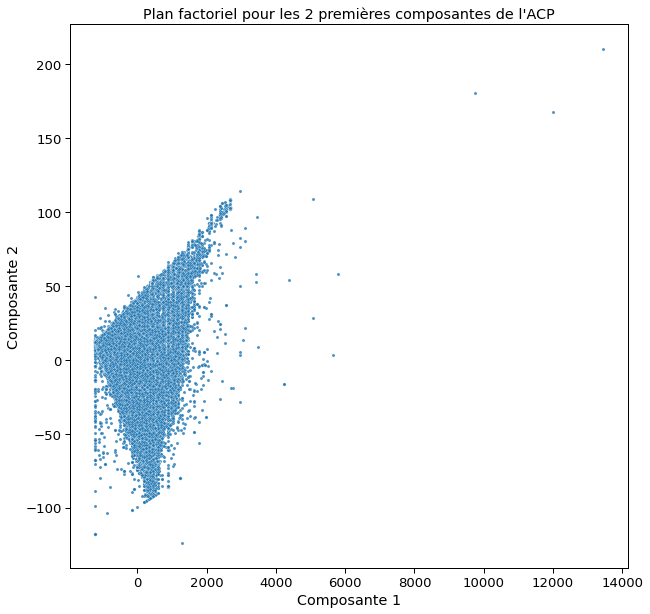

In [45]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = y_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1)

## <font color=#FF006E>Reste a faire</font>